# Trade Markets Analytics

# 1.Introduction

select * from users;


select * from trades;


select count(*) from users;

select count(*) from trades where login_hash in (select login_hash from users);


select count(*) from trades;-- where login_hash in (select login_hash from users);
select count(*) from trades t inner join users u on t.login_hash = u.login_hash; -- where login_hash in (select login_hash from users);



In [646]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [585]:
users = pd.read_csv('/content/Users.csv')
trades = pd.read_csv('/content/Trades.csv')

# 1.1 Users

In [586]:
users.shape

(1000, 5)

In [587]:
users.head(3)

,login_hash,server_hash,country_hash,currency,enable
0,03A15F382AF3D505592CA69EFD4DC431,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1
1,F8ADF5FF9840712CE2AF7FA9EA2A3FA7,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1
2,B78CD788AB20A5D61CB13BD5389CABB3,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1


In [588]:
users['server_hash'].unique()

array(['76791A893BDB9A68E8EE44898D581A60',
       '3D1F7E00251C43107EF39F55300781DB',
       '54203B42716FE7C40138AE6C4913EBBC'], dtype=object)

In [589]:
users['server_hash'] = users['server_hash'].map({'76791A893BDB9A68E8EE44898D581A60':'S1','3D1F7E00251C43107EF39F55300781DB':'S2','54203B42716FE7C40138AE6C4913EBBC':'S3'})

In [590]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   login_hash    1000 non-null   object
 1   server_hash   1000 non-null   object
 2   country_hash  1000 non-null   object
 3   currency      1000 non-null   object
 4   enable        1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [591]:
users.isna().sum()

login_hash      0
server_hash     0
country_hash    0
currency        0
enable          0
dtype: int64

In [592]:
servers = users['server_hash'].unique()
print('Number of servers:',len(servers))
country = users['country_hash'].unique()
print('Number of countries:',len(country))

Number of servers: 3
Number of countries: 19


In [593]:
users['enable'].value_counts()

1    973
0     27
Name: enable, dtype: int64

In [594]:
cur = users['currency'].value_counts().to_frame('Count')
cur

,Count
USD,906
AUD,91
NZD,2
EUR,1


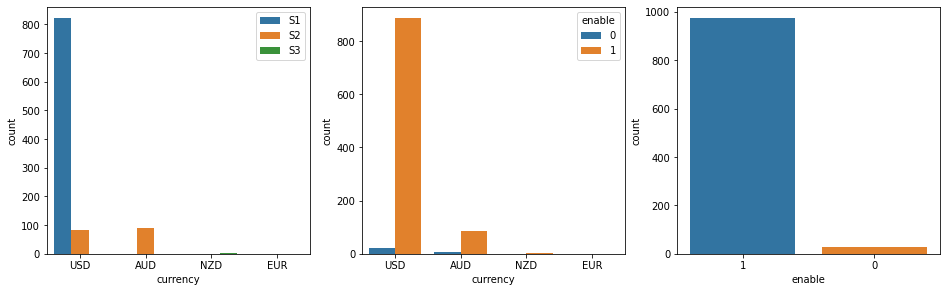

In [595]:
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.countplot(data = users, x='currency',order=users['currency'].value_counts().index,hue='server_hash')
plt.legend(loc='upper right')
plt.subplot(2,3,2)
sns.countplot(data = users, x='currency',order=users['currency'].value_counts().index,hue='enable')
plt.subplot(2,3,3)
sns.countplot(data = users, x='enable',order=users['enable'].value_counts().index)
plt.show()

#1.2 Trades

In [596]:
trades.head(3)

,login_hash,ticket_hash,server_hash,symbol,digits,cmd,volume,open_time,open_price,close_time,contractsize
0,0DF500A57244E5B1670277767BEBB554,B321DC57F3B410507B986DD8962F8B1C,2F1CA40D76D7E6165DBA3924CE0D3B5C,EURUSD,5,1,5,2020-08-19 12:19:11,1.19459,2020-08-19 12:48:09,100000.0
1,6D66E192834605522190E51BF226FF5B,F68DA930EE1129D94EDFA02EBAF9E7B4,2F1CA40D76D7E6165DBA3924CE0D3B5C,XAUUSD,2,1,1,2020-08-28 03:09:02,1925.48000,2020-08-28 06:03:45,100.0
2,04852EC1A7D9FB8A291A24DDCE8C62B9,E351B480079ADEC7F6E6BE3ACEEA6EDF,2F1CA40D76D7E6165DBA3924CE0D3B5C,EURGBP,5,0,10,2020-08-25 13:47:34,0.90157,2020-09-08 12:20:43,100000.0


In [597]:
trades['server_hash'].unique()

array(['2F1CA40D76D7E6165DBA3924CE0D3B5C',
       '3D1F7E00251C43107EF39F55300781DB',
       '54203B42716FE7C40138AE6C4913EBBC'], dtype=object)

In [598]:
trades['server_hash'] = trades['server_hash'].map({'2F1CA40D76D7E6165DBA3924CE0D3B5C':'S4','76791A893BDB9A68E8EE44898D581A60':'S1','3D1F7E00251C43107EF39F55300781DB':'S2','54203B42716FE7C40138AE6C4913EBBC':'S3'})

In [599]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   login_hash    100000 non-null  object 
 1   ticket_hash   100000 non-null  object 
 2   server_hash   100000 non-null  object 
 3   symbol        100000 non-null  object 
 4   digits        100000 non-null  int64  
 5   cmd           100000 non-null  int64  
 6   volume        100000 non-null  int64  
 7   open_time     100000 non-null  object 
 8   open_price    100000 non-null  float64
 9   close_time    100000 non-null  object 
 10  contractsize  99993 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 8.4+ MB


In [600]:
trades.describe()

,digits,cmd,volume,open_price,contractsize
count,100000.000000,100000.000000,100000.000000,100000.000000,99993.000000
mean,3.214250,0.448170,17.986650,1262.544975,44856.840239
std,1.463171,0.497309,100.438786,2585.110285,49669.111281
min,0.000000,0.000000,0.000000,0.591670,1.000000
25%,2.000000,0.000000,1.000000,1.190937,100.000000
50%,2.000000,0.000000,3.000000,1887.590000,100.000000
75%,5.000000,1.000000,10.000000,1967.152500,100000.000000
max,5.000000,1.000000,10000.000000,28795.000000,100000.000000


In [601]:
trades.isna().sum()

login_hash      0
ticket_hash     0
server_hash     0
symbol          0
digits          0
cmd             0
volume          0
open_time       0
open_price      0
close_time      0
contractsize    7
dtype: int64

In [602]:
# Number of contracts with size 100 and 100000 are significantly high and almost equal, we can drop the rows rather than imputation
trades.dropna(axis=0,inplace=True)

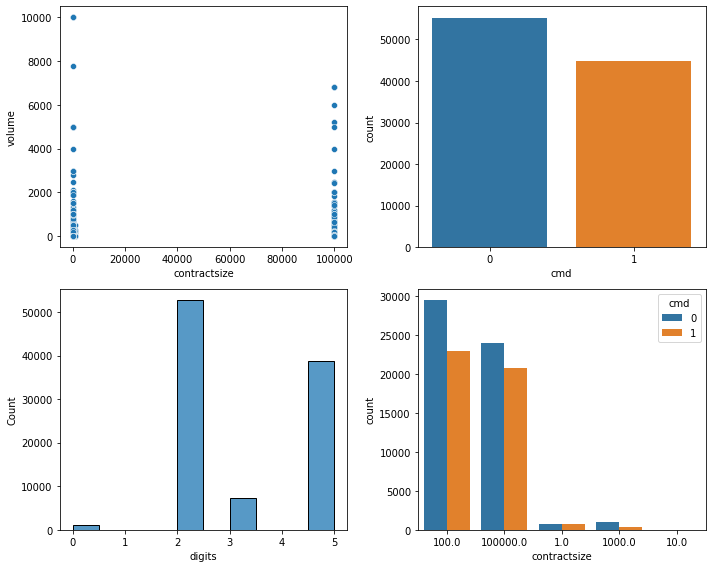

In [603]:
#sns.pairplot(trades)
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.scatterplot(data = trades, x='contractsize',y=trades['volume'])
plt.subplot(2,2,2)
sns.countplot(data = trades, x='cmd',order=trades['cmd'].value_counts().index)
plt.subplot(2,2,3)
sns.histplot(trades['digits'],bins=10)
plt.subplot(2,2,4)
sns.countplot( data = trades, x='contractsize',order=trades['contractsize'].value_counts().index,hue='cmd')
plt.tight_layout()
plt.show()

In [604]:
cur_pairs = trades.symbol.value_counts().to_frame('Orders')
cur_pairs[cur_pairs['Orders']>1000]

,Orders
XAUUSD,49165
EURUSD,17609
GBPUSD,6723
XTIUSD,2352
EURCHF,1989
USDJPY,1907
GBPJPY,1869
AUDUSD,1803
USDCHF,1592
XAGUSD,1328


In [605]:
trades['close_time'] = pd.to_datetime(trades['close_time'])
trades['open_time'] = pd.to_datetime(trades['open_time'])

In [606]:
trades['cmd'] = trades['cmd'].astype(np.object)

In [607]:
#trades['time_duration'] = trades['close_time']-trades['open_time']

In [608]:
#sns.distplot(trades['time_duration'])


trades['open_year'] = trades['open_time'].dt.year
trades['close_year'] = trades['close_time'].dt.year
trades['open_month'] = trades['open_time'].dt.month
trades['close_month'] = trades['close_time'].dt.month
trades['open_day'] = trades['open_time'].dt.day
trades['close_day'] = trades['close_time'].dt.day
trades['open_hr'] = trades['open_time'].dt.hour
trades['close_hr'] = trades['close_time'].dt.hour
trades['open_min'] = trades['open_time'].dt.minute
trades['close_min'] = trades['close_time'].dt.minute
trades['open_sec'] = trades['open_time'].dt.second
trades['close_sec'] = trades['close_time'].dt.second

In [609]:
#trades['close_year'].value_counts()

In [610]:
#trades['time_diff_day'] = trades['time_duration'].values.astype('datetime64[D]')

In [611]:
#trades['time_duration'].values.astype('datetime64[D]')
#trades[['time_duration']].apply(pd.to_numeric)


#trades['time_duration'] = (trades['close_time']-trades['open_time']).dt.day
#trades['time_duration']

In [612]:
#trades['time_diff_day']

In [613]:
df = pd.merge(users, trades, how='inner', on='login_hash')

In [614]:
df.shape

(36067, 15)

In [615]:
#df['diff_year'] = df['close_year'] - df['open_year']
#df['diff_month'] = df['open_month'] - df['close_month'] 
#df['diff_day'] = df['open_day'] - df['close_day']
#df['diff_hr'] = df['open_hr'] - df['close_hr']
#df['diff_min'] = df['open_min'] - df['close_min']
#df['diff_sec'] = df['open_sec'] - df['close_sec']

In [616]:
df.head()

,login_hash,server_hash_x,country_hash,currency,enable,ticket_hash,server_hash_y,symbol,digits,cmd,volume,open_time,open_price,close_time,contractsize
0,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,079A2E7D6C17E4F82D0F2215E0F8CBC9,S2,CHFJPY,3,1,1,2020-08-12 15:53:30,117.15000,2020-08-12 15:55:52,100000.0
1,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,9CCEAE55FF215C71E3486890C2908467,S2,AUDNZD,5,0,5,2020-08-31 08:54:34,1.09184,2020-08-31 12:17:38,100000.0
2,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,9AEEAF4DBFD3BC3D0C74E0547A5E63CC,S2,NZDCHF,5,1,2,2020-08-26 16:46:48,0.59741,2020-11-10 11:46:38,100000.0
3,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,33419C6F0853738662AD6F2B4634E4FA,S2,AUDNZD,5,1,15,2020-08-07 09:55:24,1.08127,2020-09-18 07:20:12,100000.0
4,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,F59719624F9069434028DC77BD2C27A6,S2,GBPAUD,5,1,1,2020-08-27 15:40:42,1.81941,2020-08-27 16:58:55,100000.0


In [617]:
df_train = df.copy()

In [618]:
df_train.isna().sum()

login_hash       0
server_hash_x    0
country_hash     0
currency         0
enable           0
ticket_hash      0
server_hash_y    0
symbol           0
digits           0
cmd              0
volume           0
open_time        0
open_price       0
close_time       0
contractsize     0
dtype: int64

Performing labelling to non-int data

In [619]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36067 entries, 0 to 36066
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   login_hash     36067 non-null  object        
 1   server_hash_x  36067 non-null  object        
 2   country_hash   36067 non-null  object        
 3   currency       36067 non-null  object        
 4   enable         36067 non-null  int64         
 5   ticket_hash    36067 non-null  object        
 6   server_hash_y  36067 non-null  object        
 7   symbol         36067 non-null  object        
 8   digits         36067 non-null  int64         
 9   cmd            36067 non-null  object        
 10  volume         36067 non-null  int64         
 11  open_time      36067 non-null  datetime64[ns]
 12  open_price     36067 non-null  float64       
 13  close_time     36067 non-null  datetime64[ns]
 14  contractsize   36067 non-null  float64       
dtypes: datetime64[ns](2

In [620]:
df['server_hash_x'].value_counts()

S2    35960
S3      107
Name: server_hash_x, dtype: int64

In [621]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [622]:
df_ser = pd.get_dummies(df['server_hash_x'], drop_first=True)
df_cur = pd.get_dummies(df['country_hash'], drop_first=True)
df_train2 = pd.concat((df_train,df_cur,df_ser), axis=1)

In [623]:
df_train2

,login_hash,server_hash_x,country_hash,currency,enable,ticket_hash,server_hash_y,symbol,digits,cmd,volume,open_time,open_price,close_time,contractsize,221CDFB73049678E244380B45872CBB2,4442E4AF0916F53A07FB8CA9A49B98ED,4A2581E346483DA488A11C4B2D2DE97E,551FE18EF47D4E6E9D943B9A68ADA21D,77DAB2F81A6C8C9136EFBA7AB2C4C0F2,89F9C9F489BE2A83CF57E53B9197D288,907EBA32D950BFAB68227FD7EA22999B,A67D4CBDD1B59E0FFCCC6BAFC83EB033,A8F809C99C4A996780C3046B9B594195,AE54A5C026F31ADA088992587D92CB3A,C51ED580EA5E20C910D951F692512B4D,S3
0,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,079A2E7D6C17E4F82D0F2215E0F8CBC9,S2,CHFJPY,3,1,1,2020-08-12 15:53:30,117.15000,2020-08-12 15:55:52,100000.0,0,1,0,0,0,0,0,0,0,0,0,0
1,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,9CCEAE55FF215C71E3486890C2908467,S2,AUDNZD,5,0,5,2020-08-31 08:54:34,1.09184,2020-08-31 12:17:38,100000.0,0,1,0,0,0,0,0,0,0,0,0,0
2,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,9AEEAF4DBFD3BC3D0C74E0547A5E63CC,S2,NZDCHF,5,1,2,2020-08-26 16:46:48,0.59741,2020-11-10 11:46:38,100000.0,0,1,0,0,0,0,0,0,0,0,0,0
3,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,33419C6F0853738662AD6F2B4634E4FA,S2,AUDNZD,5,1,15,2020-08-07 09:55:24,1.08127,2020-09-18 07:20:12,100000.0,0,1,0,0,0,0,0,0,0,0,0,0
4,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,F59719624F9069434028DC77BD2C27A6,S2,GBPAUD,5,1,1,2020-08-27 15:40:42,1.81941,2020-08-27 16:58:55,100000.0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36062,63772A5F9798F765896235B07E6BC449,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,D34F969A21F0960EA66D82E8E7085895,S2,GBPUSD,5,1,5,2020-08-28 07:31:52,1.32400,2020-08-28 07:40:59,100000.0,0,1,0,0,0,0,0,0,0,0,0,0
36063,63772A5F9798F765896235B07E6BC449,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,8A76E6507E13A0C1ADA76D65BDC8286C,S2,XAUUSD,2,0,1,2020-08-28 13:02:54,1956.86000,2020-08-28 13:05:28,100.0,0,1,0,0,0,0,0,0,0,0,0,0
36064,63772A5F9798F765896235B07E6BC449,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,10A5AFDAC6EF6DD6440025DBBFCC8225,S2,XAUUSD,2,0,1,2020-08-28 03:18:34,1926.99000,2020-08-28 03:19:21,100.0,0,1,0,0,0,0,0,0,0,0,0,0
36065,63772A5F9798F765896235B07E6BC449,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,650DC22D9210101A4ED7DFF8FC0DF81D,S2,XAUUSD,2,1,2,2020-08-28 05:10:24,1936.33000,2020-08-28 05:10:58,100.0,0,1,0,0,0,0,0,0,0,0,0,0


In [624]:
cols_drop = ['login_hash','country_hash','server_hash_x','server_hash_y','open_time','close_time']#,'time_duration']

In [625]:
df_login_hash = df_train2['login_hash']
df_train2.drop(labels=cols_drop,axis=1,inplace=True)

In [626]:
obj_cols = df_train2.select_dtypes(np.object).columns.to_list()

In [627]:
le = LabelEncoder()
for col in obj_cols:
  df_train2[col] = le.fit_transform(df_train2[col])

In [628]:
df_train2.head(3)

,currency,enable,ticket_hash,symbol,digits,cmd,volume,open_price,contractsize,221CDFB73049678E244380B45872CBB2,4442E4AF0916F53A07FB8CA9A49B98ED,4A2581E346483DA488A11C4B2D2DE97E,551FE18EF47D4E6E9D943B9A68ADA21D,77DAB2F81A6C8C9136EFBA7AB2C4C0F2,89F9C9F489BE2A83CF57E53B9197D288,907EBA32D950BFAB68227FD7EA22999B,A67D4CBDD1B59E0FFCCC6BAFC83EB033,A8F809C99C4A996780C3046B9B594195,AE54A5C026F31ADA088992587D92CB3A,C51ED580EA5E20C910D951F692512B4D,S3
0,0,1,284,10,3,1,1,117.15000,100000.0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,4880,3,5,0,5,1.09184,100000.0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,4825,28,5,1,2,0.59741,100000.0,0,1,0,0,0,0,0,0,0,0,0,0


In [629]:
sc = StandardScaler()

df_scaled = sc.fit_transform(df_train2)

In [630]:
df = pd.DataFrame(df_scaled)
df.columns = df_train2.columns
df.head(2)

,currency,enable,ticket_hash,symbol,digits,cmd,volume,open_price,contractsize,221CDFB73049678E244380B45872CBB2,4442E4AF0916F53A07FB8CA9A49B98ED,4A2581E346483DA488A11C4B2D2DE97E,551FE18EF47D4E6E9D943B9A68ADA21D,77DAB2F81A6C8C9136EFBA7AB2C4C0F2,89F9C9F489BE2A83CF57E53B9197D288,907EBA32D950BFAB68227FD7EA22999B,A67D4CBDD1B59E0FFCCC6BAFC83EB033,A8F809C99C4A996780C3046B9B594195,AE54A5C026F31ADA088992587D92CB3A,C51ED580EA5E20C910D951F692512B4D,S3
0,-1.875288,0.189635,-1.636807,-1.091957,-1.253201,1.050487,-0.165768,-0.199576,0.460224,-0.010532,0.28103,-0.073729,-0.14383,-0.032901,-0.199761,-0.040821,-0.025804,-0.041497,-0.047149,-0.035345,-0.054548
1,-1.875288,0.189635,0.375591,-1.761878,0.474663,-0.951940,-0.060846,-0.284855,0.460224,-0.010532,0.28103,-0.073729,-0.14383,-0.032901,-0.199761,-0.040821,-0.025804,-0.041497,-0.047149,-0.035345,-0.054548


#3.Modelling

In [638]:
df.columns

Index(['currency', 'enable', 'ticket_hash', 'symbol', 'digits', 'cmd',
       'volume', 'open_price', 'contractsize',
       '221CDFB73049678E244380B45872CBB2', '4442E4AF0916F53A07FB8CA9A49B98ED',
       '4A2581E346483DA488A11C4B2D2DE97E', '551FE18EF47D4E6E9D943B9A68ADA21D',
       '77DAB2F81A6C8C9136EFBA7AB2C4C0F2', '89F9C9F489BE2A83CF57E53B9197D288',
       '907EBA32D950BFAB68227FD7EA22999B', 'A67D4CBDD1B59E0FFCCC6BAFC83EB033',
       'A8F809C99C4A996780C3046B9B594195', 'AE54A5C026F31ADA088992587D92CB3A',
       'C51ED580EA5E20C910D951F692512B4D', 'S3', 'Cluster'],
      dtype='object')

In [632]:
"""df_t = df[['currency', 'enable', 'symbol', 'digits', 'cmd',
       'volume', 'open_price', 'contractsize'
       , 'open_year', 'close_year',
       'open_month', 'close_month', 'open_day', 'close_day', 'open_hr',
       'close_hr', 'open_min', 'close_min', 'open_sec', 'close_sec']]"""

"df_t = df[['currency', 'enable', 'symbol', 'digits', 'cmd',\n       'volume', 'open_price', 'contractsize'\n       , 'open_year', 'close_year',\n       'open_month', 'close_month', 'open_day', 'close_day', 'open_hr',\n       'close_hr', 'open_min', 'close_min', 'open_sec', 'close_sec']]"

In [633]:
from sklearn.cluster import KMeans

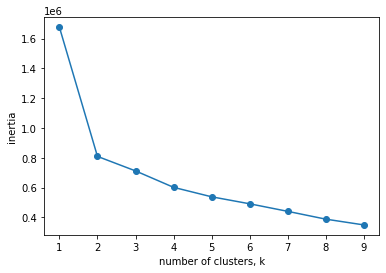

In [637]:
#km = KMeans(n_clusters=10)

ks = range(1,10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [640]:
model=KMeans(n_clusters=4)
# Fitting model
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [641]:
df['Cluster'] = model.labels_

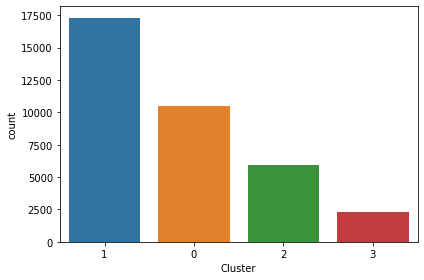

In [647]:
plt.figure(figsize=(6,4))
sns.countplot(df['Cluster'],order=df['Cluster'].value_counts().index)
plt.tight_layout()
plt.show()

Performing PCA to find out three principal components